<a href="https://colab.research.google.com/github/VictorDreke/MiFirstRepository/blob/master/Proyecto_PCS5787.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import time
from sklearn import preprocessing
from IPython.display import set_matplotlib_formats
import matplotlib.pyplot as plt
import seaborn as sn
import pickle
plt.style.use('fivethirtyeight')
from matplotlib.ticker import PercentFormatter
set_matplotlib_formats('jpg')




In [ ]:
pip install scikit-plot

In [ ]:
import scikitplot as skplt

In [ ]:
from sklearn.utils.fixes import loguniform
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix 
from sklearn.svm import SVC 
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn import model_selection
from sklearn import ensemble

# Loading Data

In [ ]:
# Nível
input_H = pd.read_csv('/content/NeutralizationDataSetH_In.csv',index_col='Model_No')
output_H = pd.read_csv('/content/NeutralizationDataSetH_out.csv')
# The index of NeutralizationDataSetH_out with the output does not align with 
#   the index on NeutralizationDataSetH_In. Therefore, the follow is made:
output_H = output_H.reindex(input_H.index)

# pH
input_pH = pd.read_csv('/content/NeutralizationDataSetpH_In.csv',index_col='Model_No')
output_pH = pd.read_csv('/content/NeutralizationDataSetpH_out.csv')
# The index of NeutralizationDataSetH_out with the output does not align with 
#   the index on NeutralizationDataSetH_In. Therefore, the follow is made:
output_pH = output_pH.reindex(input_pH.index)

# Clarke
input_clarke = pd.read_csv('/content/ClarkeDataSet_In.csv',index_col='Model_No')
output_clarke = pd.read_csv('/content/ClarkeDataSet_out.csv')
# The index of NeutralizationDataSetH_out with the output does not align with 
#   the index on NeutralizationDataSetH_In. Therefore, the follow is made:
output_clarke = output_clarke.reindex(input_clarke.index)

In [ ]:
input_clarke.head()

TIC  Willmott  Russell_Pr  ...        V_Tr        V_Ts   V_Mp
Model_No                                  ...                               
1         0.041132  0.942422    0.026184  ...    1.555834    0.295414    0.0
2         0.039219  0.942625    0.024961  ...    0.024484   -0.310072    0.0
3         1.000000      -inf         inf  ...  185.000000  200.000000  100.0
4         0.037901  0.943230    0.024127  ...    0.576458   -0.115020    0.0
5         0.038492  0.942821    0.024500  ...   -0.148321   -0.397101    0.0

[5 rows x 7 columns]

In [ ]:
output_H.head()

rwi   Ts  MESR   Mp  Class
Model_No                            
1         0.0  2.0   1.0  1.0    2.0
2         0.0  2.0   0.0  0.0    2.0
3         0.0  2.0   1.0  2.0    2.0
4         0.0  2.0   1.0  1.0    2.0
5         0.0  2.0   0.0  0.0    2.0

# Pre-processing Data

## Cleaning Data
In this stage, it is made a first cleaning of the data. All the rows containing inf, -inf and missing values will be eraesed. 
Originally, we had 3150 examples describing Level and pH control loop and we had 5250 examples describing the clarke control loop.

In [ ]:
# Nível
input_H.replace([np.inf, -np.inf], np.nan, inplace=True)
input_H.dropna(inplace=True)

output_H = output_H.loc[input_H.index.values]
output_H.dropna(inplace=True)
input_H = input_H.loc[output_H.index.values]

# pH
input_pH.replace([np.inf, -np.inf], np.nan, inplace=True)
input_pH.dropna(inplace=True)

output_pH = output_pH.loc[input_pH.index.values]
output_pH.dropna(inplace=True)
input_pH = input_pH.loc[output_pH.index.values]

# Clarke
input_clarke.replace([np.inf, -np.inf], np.nan, inplace=True)
input_clarke.dropna(inplace=True)

output_clarke = output_clarke.loc[input_clarke.index.values]
output_clarke.dropna(inplace=True)
input_clarke = input_clarke.loc[output_clarke.index.values]


## Describing and Analizing the Cleaned Data
This stage is important because based on its results, we will take the next step for processing data.
The first thing that we need to do is to examine the distribution of the data.

In [ ]:
input_H.describe()

TIC     Willmott  ...         V_Ts          V_Mp
count  3096.000000  3096.000000  ...  3096.000000  3.096000e+03
mean      0.115701    -0.186109  ...     1.004424  6.780572e+00
std       0.261306     0.698157  ...     3.327550  1.142790e+01
min       0.001722    -1.000000  ...    -0.988059  0.000000e+00
25%       0.005328    -0.810475  ...    -0.297830  0.000000e+00
50%       0.018877    -0.435956  ...    -0.031986  1.666445e-11
75%       0.054471     0.564273  ...     0.088461  1.275435e+01
max       1.000000     0.906302  ...    12.000000  8.300000e+01

[8 rows x 7 columns]

In [ ]:
input_pH.describe()

TIC     Willmott  ...         V_Ts         V_Mp
count  3134.000000  3134.000000  ...  3134.000000  3134.000000
mean      0.069978    -0.070776  ...     0.541063     3.479051
std       0.172700     0.702781  ...     2.123051    11.557281
min       0.002005    -1.000000  ...    -0.992674     0.000000
25%       0.005064    -0.802833  ...    -0.718707     0.000000
50%       0.017571    -0.184987  ...    -0.026957     0.000000
75%       0.076315     0.688719  ...     0.672698     0.000000
max       1.000000     0.923051  ...     8.691822    90.000000

[8 rows x 7 columns]

In [ ]:
input_clarke.describe()

TIC     Willmott  ...         V_Ts          V_Mp
count  5011.000000  5011.000000  ...  5011.000000  5.011000e+03
mean      0.149115     0.814845  ...     8.642586  1.303469e+01
std       0.264615     0.397610  ...    37.132840  1.483427e+01
min       0.033362    -1.000000  ...    -0.667003  0.000000e+00
25%       0.036928     0.917477  ...    -0.063027  2.220446e-14
50%       0.042867     0.940849  ...     0.144197  1.281573e+01
75%       0.074459     0.943228  ...     0.608475  1.732782e+01
max       1.000000     0.944956  ...   184.221481  1.000000e+02

[8 rows x 7 columns]

## Visualizing cleaned Input Data

In [ ]:
def boxxplt(datta, name):
  qtd_x = (len(datta.columns)//4) + 1
  fig, axs = plt.subplots(nrows=qtd_x, ncols=4, figsize=(13,12))
  fig.tight_layout(pad=3.0)
  for pos_row in np.arange(qtd_x):
    if pos_row==(qtd_x - 1) and len(datta.columns)%4!=0:
      max_pos_col = len(datta.columns)%4
    else:
      max_pos_col = 4
    for pos_col in np.arange(max_pos_col):
      l = datta.columns[4*pos_row + pos_col]
      axs[pos_row,pos_col].boxplot(datta[l]) 
      axs[pos_row,pos_col].set_title(l)
  title = 'Boxplot describing the ' + name + ' control loop'   
  plt.savefig('boxplot_' + name + '.jpg', format='jpg', dpi=300)

# This function handles ploting the boxplots that describe the data. In this 
# case, the main library is thee matplotlib. 
      


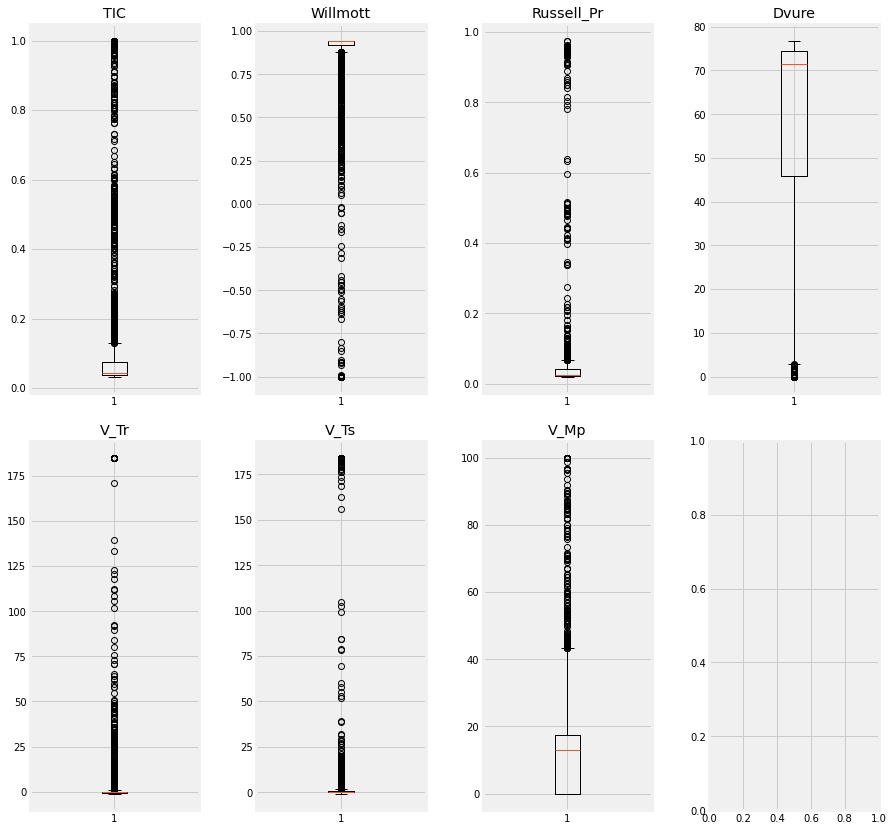

In [ ]:
boxxplt(input_clarke, 'clarke')

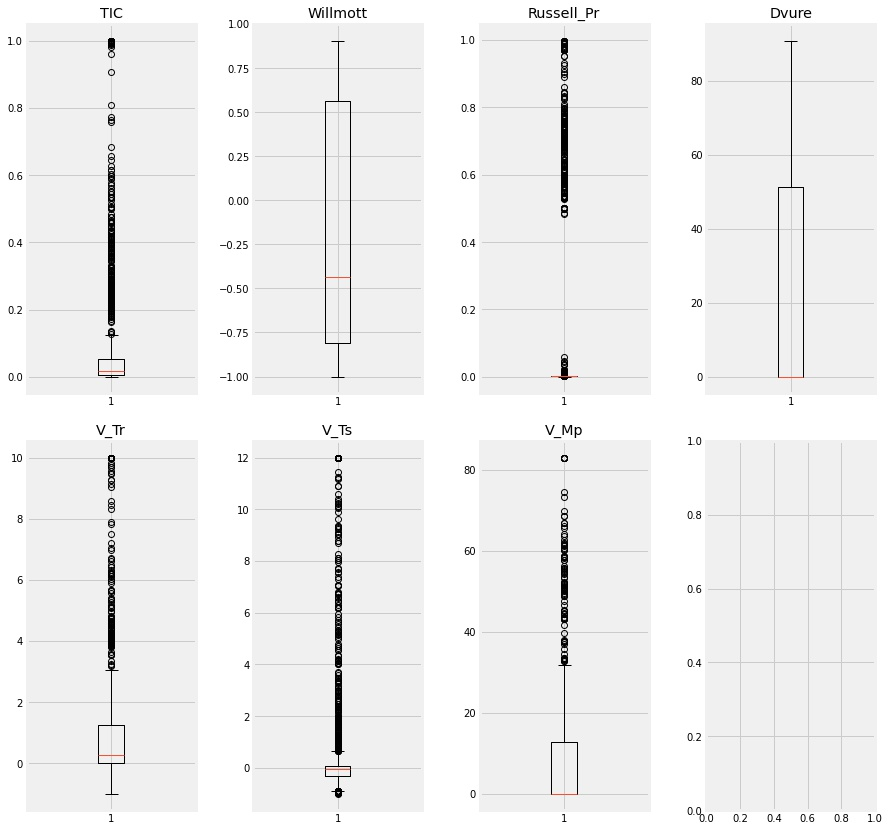

In [ ]:
boxxplt(input_H, 'Level')

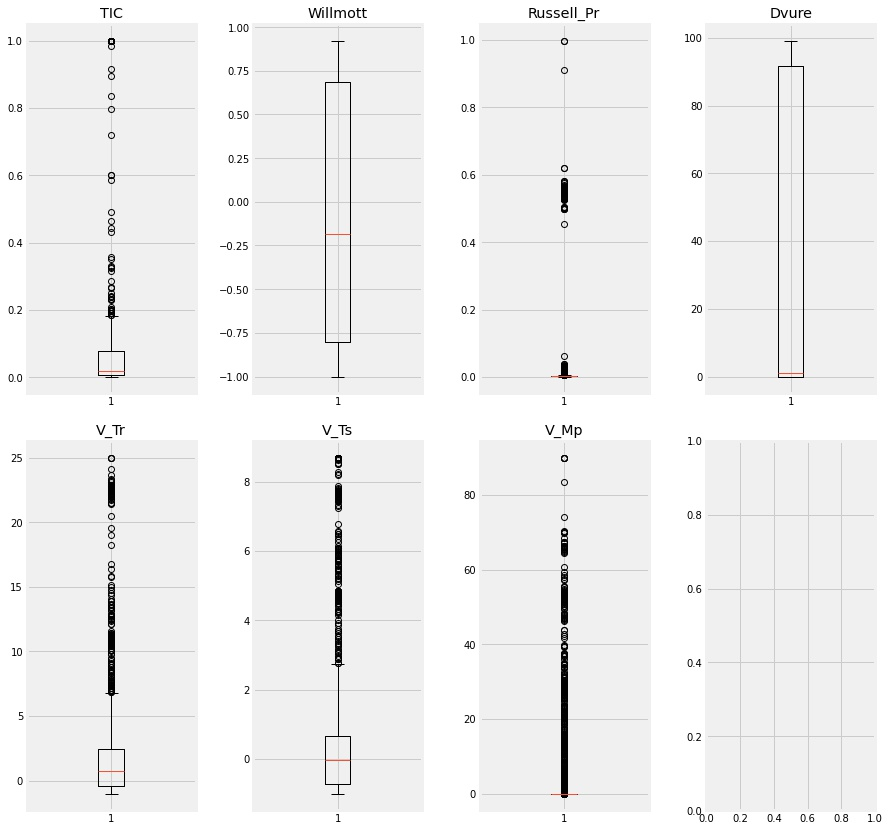

In [ ]:
boxxplt(input_pH, 'pH')

## Visualizing the Output Data
The output data is categorical; therefore, the main concern is to examine for skwed classes.

<Figure size 432x288 with 0 Axes>

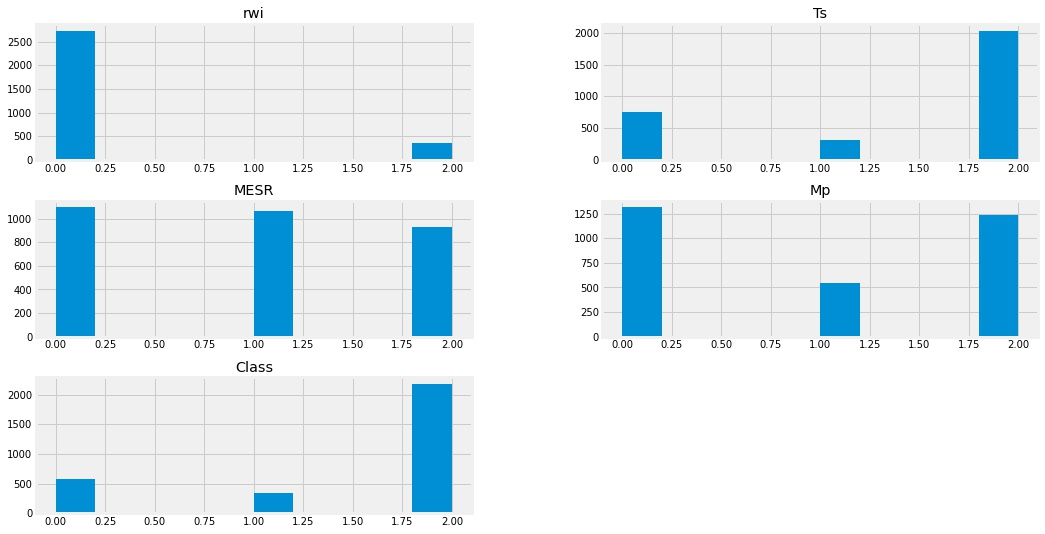

In [ ]:
plt.figure()
output_H.hist(figsize=(16,9))
plt.savefig('histograma_' + 'H' + '.jpg', format='jpg', dpi=300)

<Figure size 432x288 with 0 Axes>

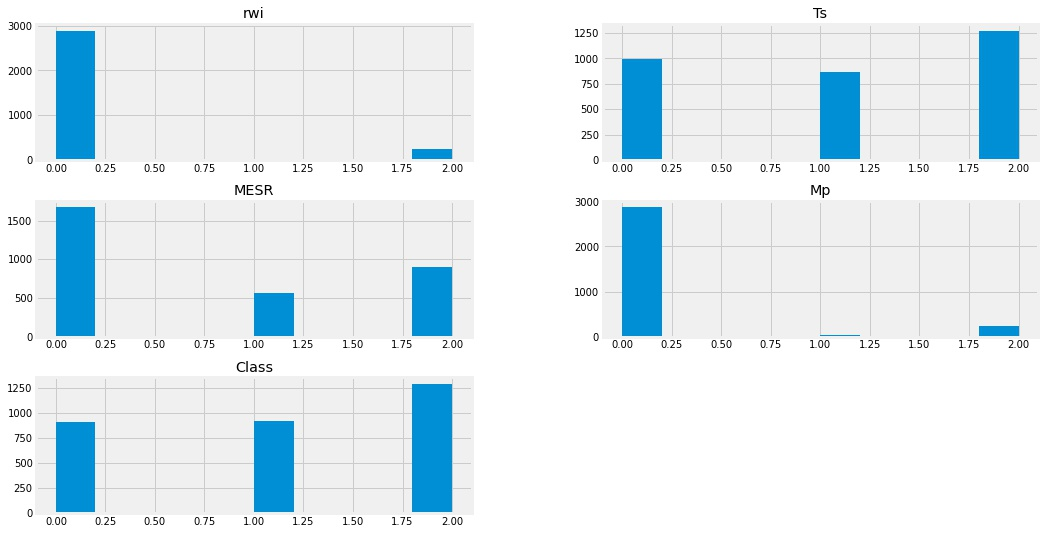

In [ ]:
plt.figure()
output_pH.hist(figsize=(16,9))
plt.savefig('histograma_' + 'pH' + '.jpg', format='jpg', dpi=300)

<Figure size 432x288 with 0 Axes>

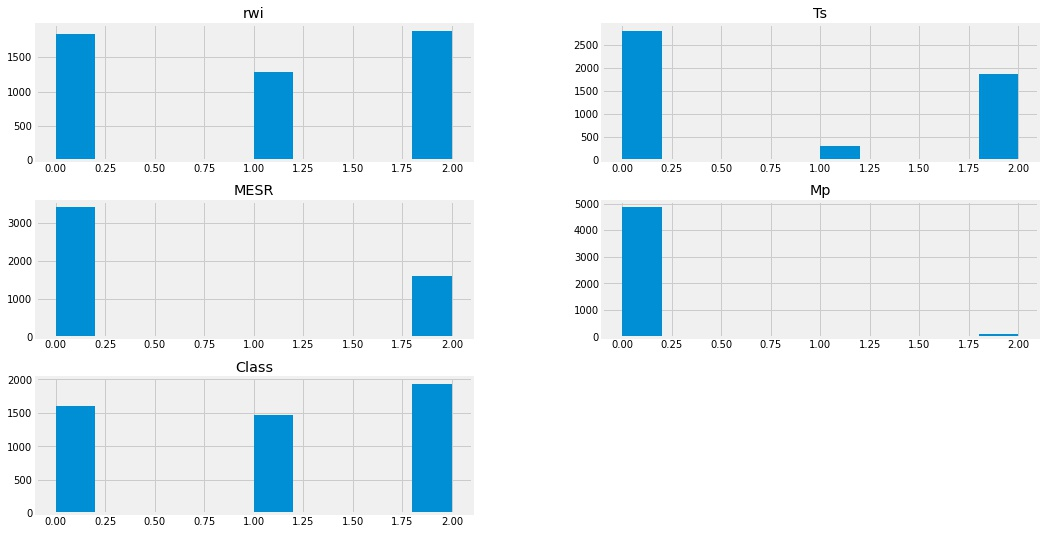

In [ ]:
plt.figure()
output_clarke.hist(figsize=(16,9))
plt.savefig('histograma_' + 'Clarke' + '.jpg', format='jpg', dpi=300)

## Data Normalization
Based on the evidenced behaivour of the input data, the need for data normalization gets clear. Due to the presence of outlier, we will be using a robust normalization technique.

In [ ]:
# Scale features

#normalization_clarke = preprocessing.MinMaxScaler(feature_range=(-200,200))
#normalization_H = preprocessing.MinMaxScaler(feature_range=(-200,200))
#normalization_pH = preprocessing.MinMaxScaler(feature_range=(-200,200))

# Robust scaler
normalization_clarke = preprocessing.RobustScaler()
normalization_H = preprocessing.RobustScaler()
normalization_pH = preprocessing.RobustScaler()

normalized_clarke = normalization_clarke.fit_transform(input_clarke)
normalized_H = normalization_clarke.fit_transform(input_H)
normalized_pH = normalization_clarke.fit_transform(input_pH)






# Correlation analysis
In this stage, we do a corralation analysis aiming to obtain information about which are the better inputs. Other information obtained on this stage is how linear is the relationship between the data.

In [ ]:
input_H.corr()

TIC  Willmott  Russell_Pr  ...      V_Tr      V_Ts      V_Mp
TIC         1.000000 -0.468964    0.916243  ...  0.835837  0.912113  0.013157
Willmott   -0.468964  1.000000   -0.317375  ... -0.483459 -0.402210  0.167417
Russell_Pr  0.916243 -0.317375    1.000000  ...  0.816678  0.855785 -0.082870
Dvure      -0.259441  0.857504   -0.164395  ... -0.283560 -0.210282  0.185672
V_Tr        0.835837 -0.483459    0.816678  ...  1.000000  0.819854 -0.224554
V_Ts        0.912113 -0.402210    0.855785  ...  0.819854  1.000000  0.154295
V_Mp        0.013157  0.167417   -0.082870  ... -0.224554  0.154295  1.000000

[7 rows x 7 columns]

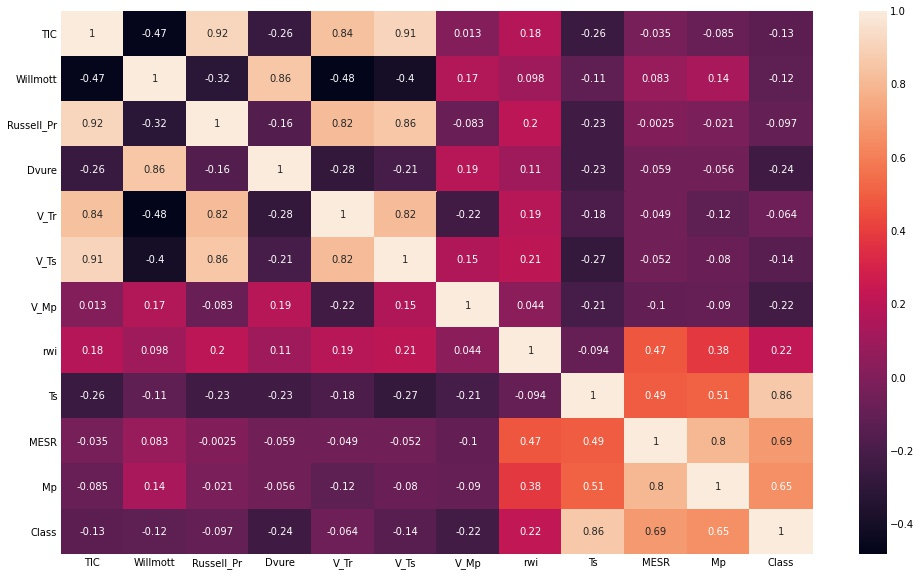

In [ ]:
temp = input_H.join(output_H)
plt.figure(figsize = (15,10))
sn.heatmap(temp.corr(), annot=True)
plt.savefig('corr_' + 'H' + '.jpg', format='jpg', dpi=300)

In [ ]:
input_pH.corr()

TIC  Willmott  Russell_Pr  ...      V_Tr      V_Ts      V_Mp
TIC         1.000000 -0.440760    0.929265  ...  0.211882  0.740711 -0.001539
Willmott   -0.440760  1.000000   -0.241457  ... -0.425284 -0.466564  0.128468
Russell_Pr  0.929265 -0.241457    1.000000  ...  0.093389  0.646550 -0.004924
Dvure      -0.319021  0.928726   -0.157244  ... -0.351850 -0.362241  0.129930
V_Tr        0.211882 -0.425284    0.093389  ...  1.000000  0.705121 -0.172047
V_Ts        0.740711 -0.466564    0.646550  ...  0.705121  1.000000 -0.012583
V_Mp       -0.001539  0.128468   -0.004924  ... -0.172047 -0.012583  1.000000

[7 rows x 7 columns]

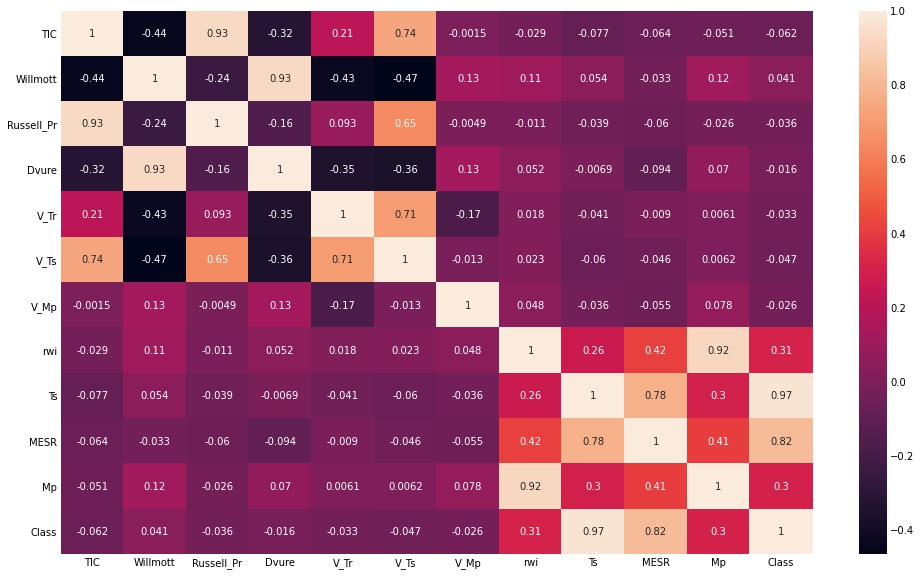

In [ ]:
temp = input_pH.join(output_pH)
plt.figure(figsize = (15,10))
sn.heatmap(temp.corr(), annot=True)
plt.savefig('corr_' + 'pH' + '.jpg', format='jpg', dpi=300)

In [ ]:
input_clarke.corr()

TIC  Willmott  Russell_Pr  ...      V_Tr      V_Ts      V_Mp
TIC         1.000000 -0.864974    0.871497  ...  0.331520  0.655059  0.109089
Willmott   -0.864974  1.000000   -0.697796  ... -0.392007 -0.904571  0.053747
Russell_Pr  0.871497 -0.697796    1.000000  ...  0.265447  0.469079 -0.046845
Dvure      -0.809802  0.671909   -0.610666  ... -0.316007 -0.495065 -0.190503
V_Tr        0.331520 -0.392007    0.265447  ...  1.000000  0.484584 -0.134648
V_Ts        0.655059 -0.904571    0.469079  ...  0.484584  1.000000 -0.092583
V_Mp        0.109089  0.053747   -0.046845  ... -0.134648 -0.092583  1.000000

[7 rows x 7 columns]

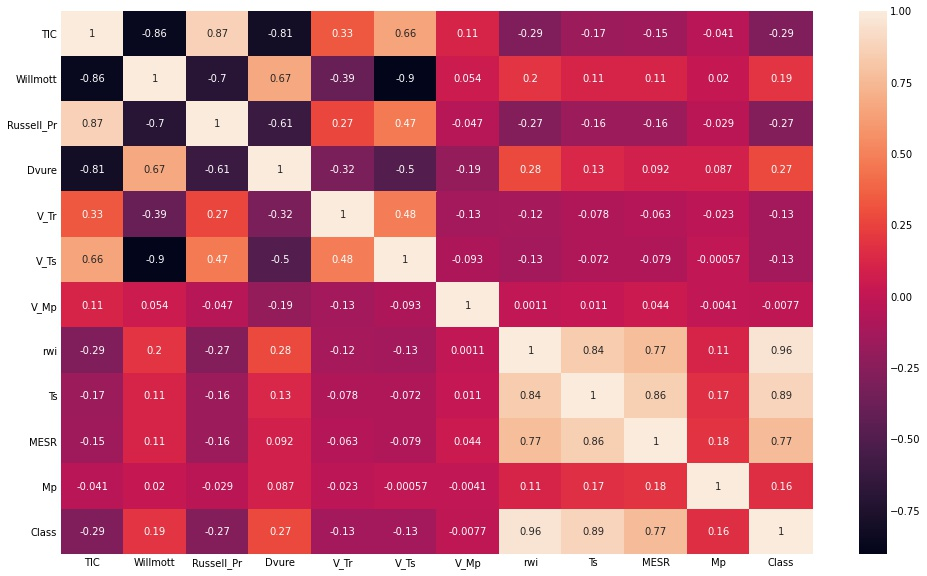

In [ ]:
temp = input_clarke.join(output_clarke)
plt.figure(figsize = (15,10))
sn.heatmap(temp.corr(), annot=True)
plt.savefig('corr_' + 'Clarke' + '.jpg', format='jpg', dpi=300)

# Visualizing Data
Before strating the training of the models, it is important to have a look of the data. 

In [ ]:
def scatter_input(input_clarke, output_clarke, name, lista):
  plt.figure(figsize=(16,9))
  title = 'Scatter of the Input Data'+ name
  plt.title(title)
  plt.ylabel(lista[1])
  plt.xlabel(lista[0])
  plt.scatter(input_clarke[lista[0]].loc[output_clarke['Class']==1],
              input_clarke[lista[1]].loc[output_clarke['Class']==1],
              s=100, c='yellow', label='Normal')
  plt.scatter(input_clarke[lista[0]].loc[output_clarke['Class']==0],
              input_clarke[lista[1]].loc[output_clarke['Class']==0],
              s=100, c='green', label='Bom')
  plt.scatter(input_clarke[lista[0]].loc[output_clarke['Class']==2],
              input_clarke[lista[1]].loc[output_clarke['Class']==2],
              s=100, c='red', label='Ruim')
  plt.savefig('scatter' + name + '.jpg', format='jpg', dpi=300)

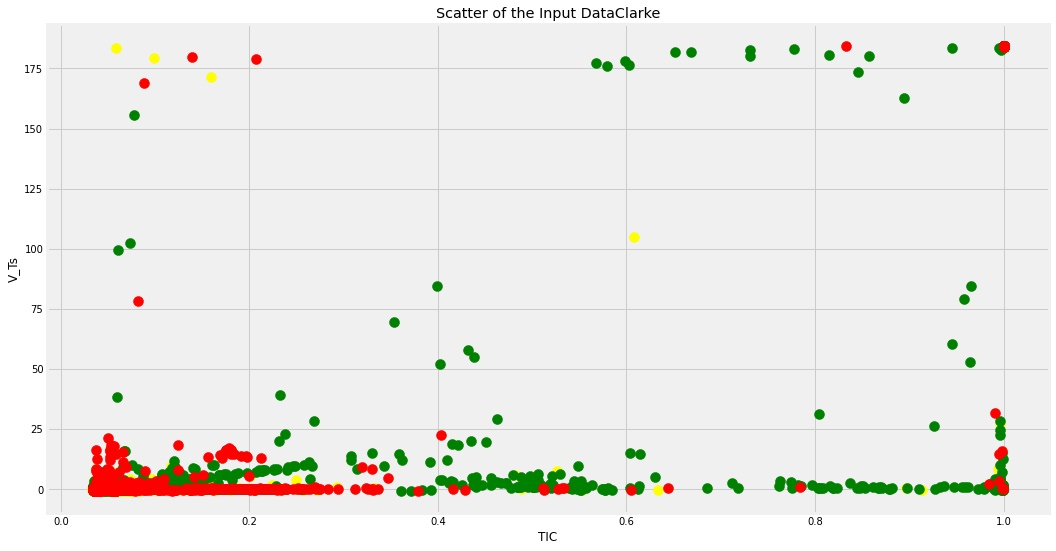

In [ ]:
scatter_input(input_clarke, output_clarke, 'Clarke', ['TIC', 'V_Ts'])

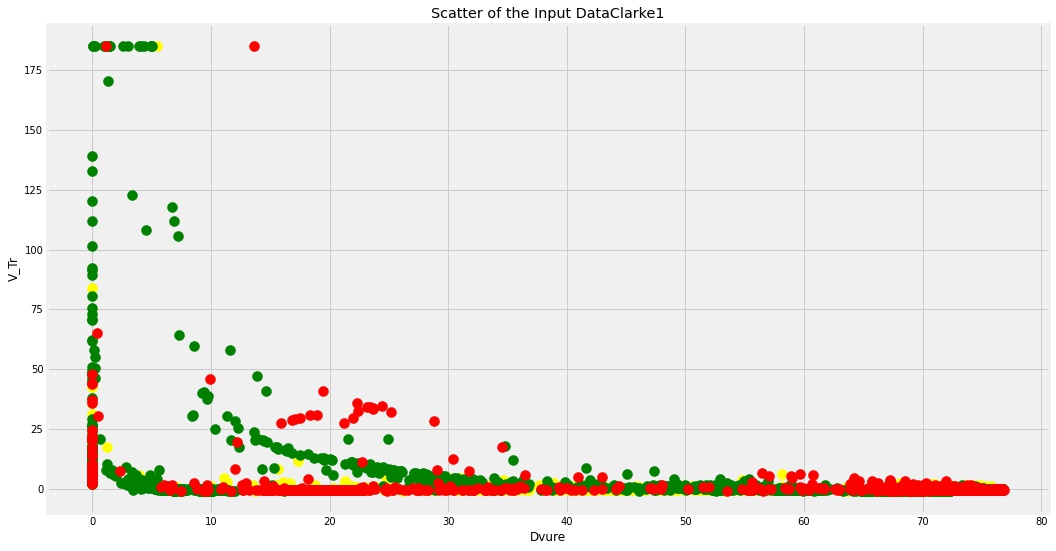

In [ ]:
scatter_input(input_clarke, output_clarke, 'Clarke1', ['Dvure', 'V_Tr'])

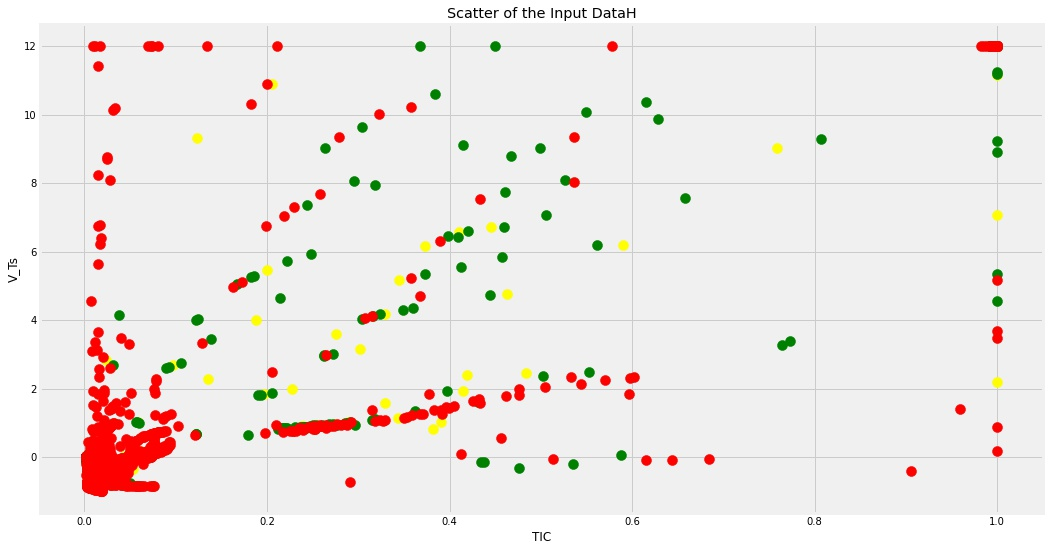

In [ ]:
scatter_input(input_H, output_H, 'H', ['TIC', 'V_Ts'])

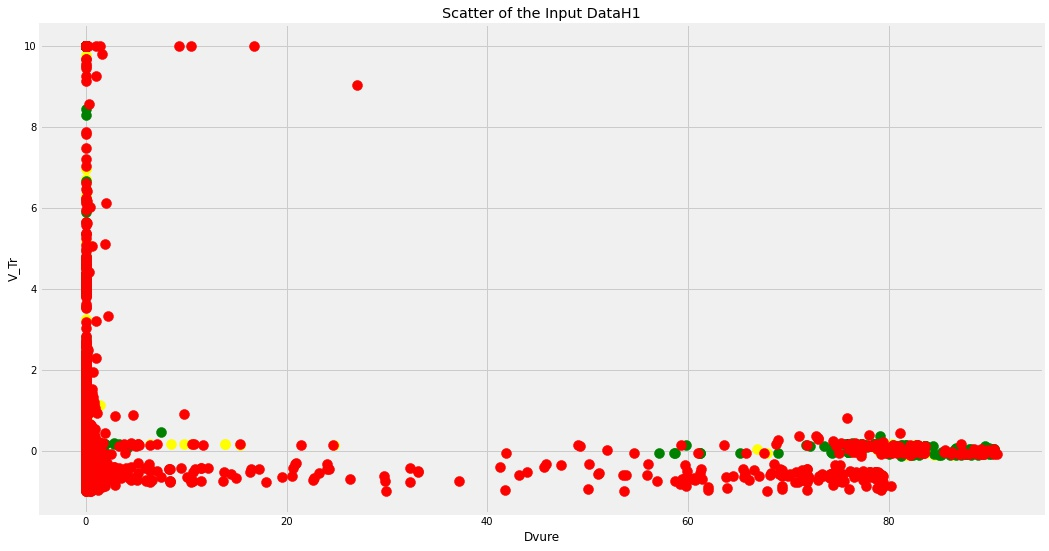

In [ ]:
scatter_input(input_H, output_H, 'H1', ['Dvure', 'V_Tr'])

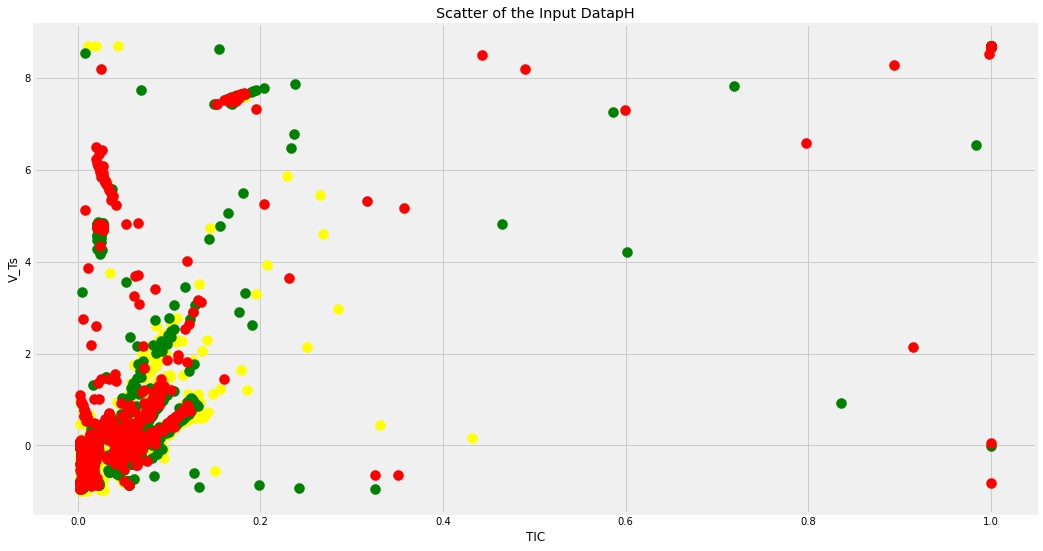

In [ ]:
scatter_input(input_pH, output_pH, 'pH', ['TIC', 'V_Ts'])

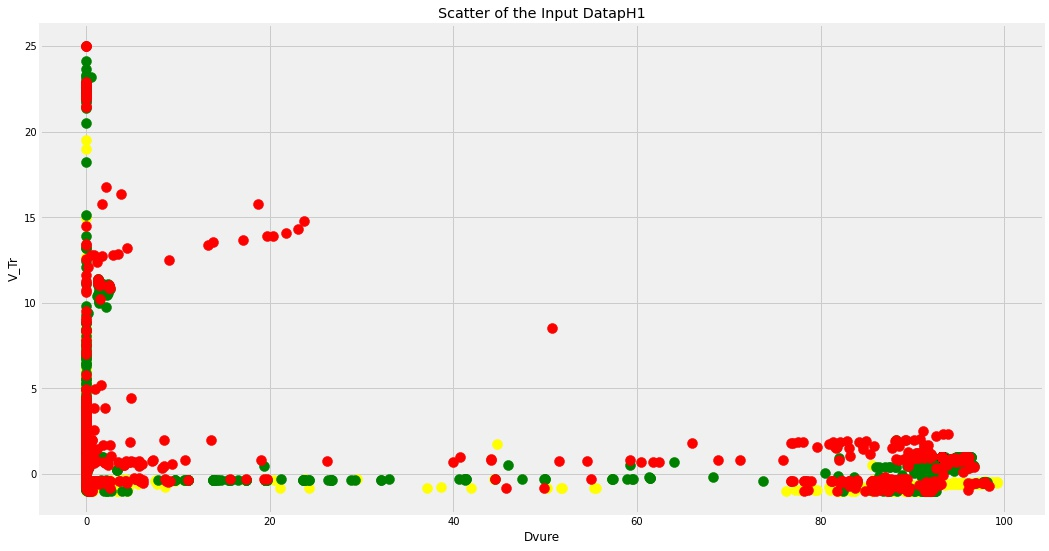

In [ ]:
scatter_input(input_pH, output_pH, 'pH1', ['Dvure', 'V_Tr'])

# Developing Artificial Inteligence Models
In this stage, we train a series ML methos to predict the output classes.

## Auxiliar Validation and Training Function

In [ ]:
def validation_classifier_function(algorithms, y_test, X_test, sel=0):
    if sel==0:
      predicted_output_target = algorithms.predict(X_test)
    else:
      predicted_output_target = algorithms.predict_classes(X_test)
    real_output_target = y_test
    prob_predicted_output_target =algorithms.predict_proba(X_test)

    clarke_accuracy = metrics.accuracy_score(
        real_output_target, predicted_output_target)
    clarke_f1_score = metrics.f1_score(
        real_output_target, predicted_output_target, average=None)
    clarke_roc_auc_score = metrics.roc_auc_score(
        real_output_target, prob_predicted_output_target, multi_class='ovo')
    cm = metrics.confusion_matrix(real_output_target, 
                                  predicted_output_target)
    target_names = ['Class Bom', 'Class Normal', 'Class Ruim']
    print(metrics.classification_report(
        real_output_target, 
        predicted_output_target,
        target_names=target_names))
    
    return clarke_accuracy, clarke_f1_score, clarke_roc_auc_score, cm

In [ ]:
def matrix_de_confusao(algorithms, y_test, X_test, name, sel=0):
  
  target_name = ['Class Bom', 'Class Normal', 'Class Ruim']
  if sel==0:
    fig, ax = plt.subplots(figsize=(19, 6))
    plot_confusion_matrix(algorithms, X_test, y_test, 
                          cmap=plt.cm.Blues, ax=ax)
  else:
    y_pred = algorithms.predict_classes(X_test)
    skplt.metrics.plot_confusion_matrix(y_test,y_pred)  

  plt.title('Confusion Matrix of ' + name)
  plt.savefig('conf_matrix' + name + '.jpg', format='jpg', dpi=300)


In [ ]:
def roc_auc_curves(algorithms, y_test, X_test, name):
  # fig, ax = plt.subplots(figsize=(19, 6))
  y_probas = algorithms.predict_proba(X_test)
  skplt.metrics.plot_roc_curve(y_test, y_probas)
  plt.title('ROC Curve ' + name)
  plt.savefig('ROC_Curve' + name + '.jpg', format='jpg', dpi=300)

In [ ]:
def svm_training(X_train, y_trian, X_test, y_test):
  # Definig the set of Hyperparameters
  parameter_grid = {
      'C':[0.01, 0.1, 1, 5, 10, 50, 100],
      'kernel':['linear','rbf','sigmoid'],
      'degree': [2,3,4,5],
      'gamma':['auto','scale'],
      'probability': ['True'],
      'class_weight': ['balanced'],
      'max_iter': [2000]

  }

  # Instantiate a SVM
  # Instantiate the RandomizedSearchCV object

  svm_classifier = RandomizedSearchCV(SVC(),param_distributions=parameter_grid,
                                      n_iter=60, cv=5, random_state=42,
                                      verbose=2)
  
  # Fitting classifier to the training set
  svm_classifier.fit(X_train, y_trian)

  # Predicting the Test set result
  prediction_target_y = svm_classifier.best_estimator_.predict(X_test)
  prediction_probab_target_y = svm_classifier.best_estimator_.predict_proba(
      X_test)

  # Making the confusion Matrix
  accuracy, f1_score, roc_auc = validation_classifier_function(
      y_test, prediction_target_y, prediction_probab_target_y)
  metrics.plot_confusion_matrix(
      svm_classifier.best_estimator_, X_test, y_test, labels=None)
  cm = metrics.confusion_matrix(y_test, prediction_target_y)

  print(accuracy, f1_score, roc_auc)
  plt.show()
  return svm_classifier

In [ ]:
def random_forrest_search(X_train, y_train,X_test, y_test):
  param_dist = {
      "max_depth": [10, 20, 30, 60, None],  
      "min_samples_leaf": np.arange(1, 10, 1),
      "criterion": ['gini', 'entropy'],
      "n_estimators": [130, 180, 256, 300, 400, 500],
      "class_weight": ['balanced', 'balanced_subsample']
  }

  # Instantiate a Decision Tree Classifier: tree
  # Instantiate the RandomizedSearchCv or SearchGridCV object: tree_cv
  randomtree = RandomizedSearchCV(
      ensemble.RandomForestClassifier(), param_distributions=param_dist, 
      cv=5, n_iter=50)
  randomtree.fit(X_train, y_train)
  print(randomtree.best_estimator_.score(X_test, y_test))
  return randomtree

In [ ]:
# rf_clarke = random_forrest_search(X_train, y_train,X_test, y_test)
# rf_H = random_forrest_search(X_train_H, y_train_H,X_test_H, y_test_H)
# rf_pH = random_forrest_search(X_train_pH, y_train_pH,X_test_pH, y_test_pH)

In [ ]:
# svm_clarke = svm_training(
#     X_train=X_train, y_trian=y_train.astype(int), 
#     X_test=X_test, y_test=y_test.astype(int))
# svm_pH = svm_training(
#     X_train=X_train_pH, y_trian=y_train_pH.astype(int), 
#     X_test=X_test_pH, y_test=y_test_pH.astype(int))
# svm_pH = svm_training(
#     X_train=X_train_H, y_trian=y_train_H.astype(int), 
#     X_test=X_test_H, y_test=y_test_H.astype(int))

## Splitting Data
75% for training
25% for validation

In [ ]:
# Clarke
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    normalized_clarke, output_clarke['Class'].values, test_size=0.25, 
    random_state=42)

In [ ]:
# pH
X_train_pH, X_test_pH, y_train_pH, y_test_pH = model_selection.train_test_split(
    normalized_pH, output_pH['Class'].values, test_size=0.33, 
    random_state=42)

In [ ]:
# H
X_train_H, X_test_H, y_train_H, y_test_H = model_selection.train_test_split(
    normalized_H, output_H['Class'].values, test_size=0.33, 
    random_state=42)

## Building ANN models

### Clarke

Creating a model to train the Clarke plant.

In [ ]:
model_clarke = keras.Sequential([
    keras.layers.Input(shape=(7,)),
    keras.layers.Dense(25, activation='relu', kernel_regularizer='l2'),
    keras.layers.Dense(75, activation='relu', kernel_regularizer='l2'),
    keras.layers.Dense(25, activation='relu', kernel_regularizer='l2'),
    keras.layers.Dense(3, activation='softmax', kernel_regularizer='l2')
])

In [ ]:
model_clarke.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                200       
_________________________________________________________________
dense_1 (Dense)              (None, 75)                1950      
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1900      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 78        
Total params: 4,128
Trainable params: 4,128
Non-trainable params: 0
_________________________________________________________________


Compeling the model

In [ ]:
model_clarke.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Training

In [ ]:
es = keras.callbacks.EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=1000)

history = model_clarke.fit(X_train, y_train, epochs=1000, batch_size=64,
                    callbacks=es, validation_data=(X_test, y_test))

#history = model.fit(X_train[:,(0,2,3,4)], y_train, epochs=1000, batch_size=64,
#                    callbacks=es, validation_split=0.15)

Epoch 1/1000
59/59 [==============================] - 0s 5ms/step - loss: 1.9220 - accuracy: 0.4196 - val_loss: 1.7015 - val_accuracy: 0.4621
Epoch 2/1000
59/59 [==============================] - 0s 3ms/step - loss: 1.6181 - accuracy: 0.4952 - val_loss: 1.5152 - val_accuracy: 0.5666
Epoch 3/1000
59/59 [==============================] - 0s 3ms/step - loss: 1.4737 - accuracy: 0.5684 - val_loss: 1.3902 - val_accuracy: 0.6049
Epoch 4/1000
59/59 [==============================] - 0s 3ms/step - loss: 1.4002 - accuracy: 0.6240 - val_loss: 1.3300 - val_accuracy: 0.6720
Epoch 5/1000
59/59 [==============================] - 0s 3ms/step - loss: 1.3191 - accuracy: 0.6895 - val_loss: 1.2920 - val_accuracy: 0.7127
Epoch 6/1000
59/59 [==============================] - 0s 3ms/step - loss: 1.3057 - accuracy: 0.7070 - val_loss: 1.2372 - val_accuracy: 0.7255
Epoch 7/1000
59/59 [==============================] - 0s 3ms/step - loss: 1.2282 - accuracy: 0.7052 - val_loss: 1.1695 - val_accuracy: 0.7342
Epoch 

Visualizing

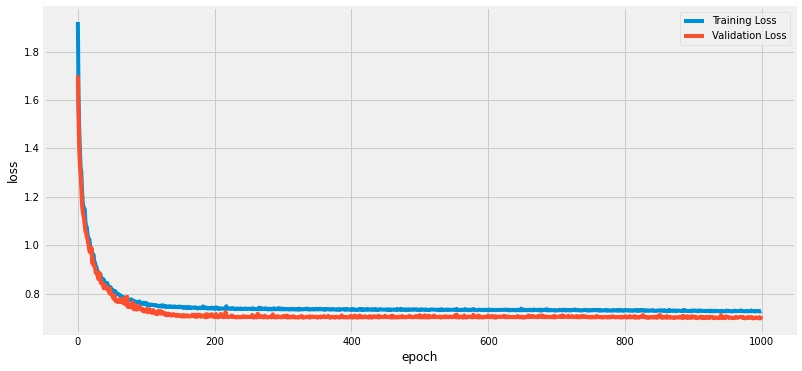

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('epoch'); plt.ylabel('loss')
plt.legend()
plt.savefig('tclab_loss.jpg')
# Save the LSTM model
model_clarke.save('model_clarke.h5')

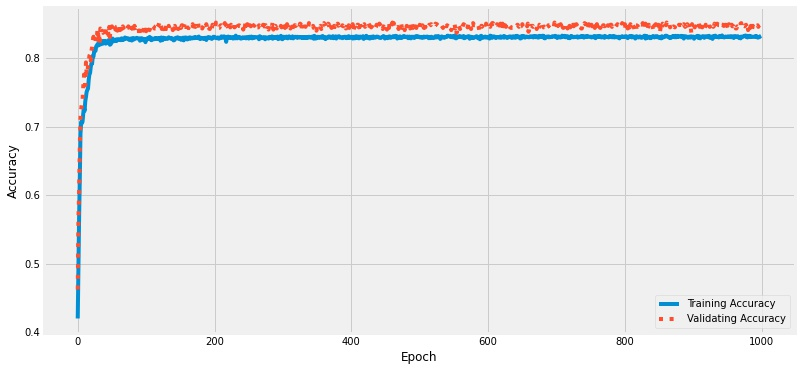

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], ':', label='Validating Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy')
plt.legend()
plt.savefig('tclab_accuracy.jpg')
# Save the LSTM model
# model.save('model.h5')

#### Validation

In [ ]:
ann_c_A, ann_c_f1, ann_c_roc, ann_c_cm = validation_classifier_function(
    model_clarke, y_test, X_test, sel=1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Instructions for updating:
Please use `model.predict()` instead.
              precision    recall  f1-score   support

   Class Bom       0.83      0.88      0.85       398
Class Normal       0.75      0.84      0.79       351
  Class Ruim       0.97      0.84      0.90       504

    accuracy                           0.85      1253
   macro avg       0.85      0.85      0.85      1253
weighted avg       0.86      0.85      0.85      1253



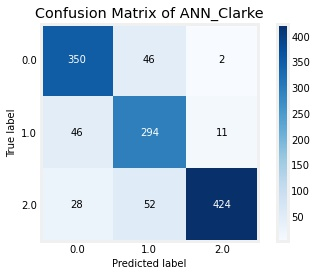

In [ ]:
matrix_de_confusao(model_clarke, y_test, X_test, 'ANN_Clarke', sel=1)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


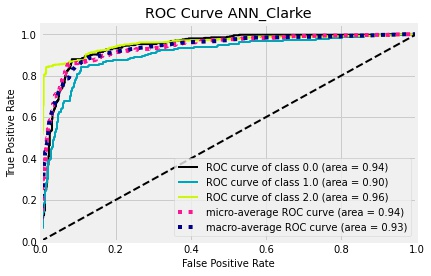

In [ ]:
roc_auc_curves(model_clarke, y_test, X_test, 'ANN_Clarke')

### pH

In [ ]:
model_pH = keras.Sequential([
    keras.layers.Input(shape=(7,)),
    keras.layers.Dense(50, activation='relu', kernel_regularizer='l2'),
    keras.layers.Dense(85, activation='relu', kernel_regularizer='l2'),
    keras.layers.Dense(25, activation='relu', kernel_regularizer='l2'),
    keras.layers.Dense(3, activation='softmax', kernel_regularizer='l2')
    ])

In [ ]:
model_pH.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                400       
_________________________________________________________________
dense_5 (Dense)              (None, 85)                4335      
_________________________________________________________________
dense_6 (Dense)              (None, 25)                2150      
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 78        
Total params: 6,963
Trainable params: 6,963
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_pH.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
es = keras.callbacks.EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=1000)

history = model_pH.fit(X_train_pH, y_train_pH, epochs=10000, batch_size=30,
                    callbacks=es, validation_data=(X_test_pH, y_test_pH))

Epoch 1/10000
70/70 [==============================] - 0s 5ms/step - loss: 2.2169 - accuracy: 0.4269 - val_loss: 1.8341 - val_accuracy: 0.4348
Epoch 2/10000
70/70 [==============================] - 0s 3ms/step - loss: 1.7441 - accuracy: 0.4326 - val_loss: 1.6587 - val_accuracy: 0.4300
Epoch 3/10000
70/70 [==============================] - 0s 3ms/step - loss: 1.5802 - accuracy: 0.4407 - val_loss: 1.5008 - val_accuracy: 0.4406
Epoch 4/10000
70/70 [==============================] - 0s 3ms/step - loss: 1.5051 - accuracy: 0.4383 - val_loss: 1.4852 - val_accuracy: 0.4570
Epoch 5/10000
70/70 [==============================] - 0s 3ms/step - loss: 1.5248 - accuracy: 0.4555 - val_loss: 1.5057 - val_accuracy: 0.4783
Epoch 6/10000
70/70 [==============================] - 0s 3ms/step - loss: 1.4425 - accuracy: 0.4960 - val_loss: 1.3557 - val_accuracy: 0.5478
Epoch 7/10000
70/70 [==============================] - 0s 4ms/step - loss: 1.3608 - accuracy: 0.5369 - val_loss: 1.3292 - val_accuracy: 0.5382

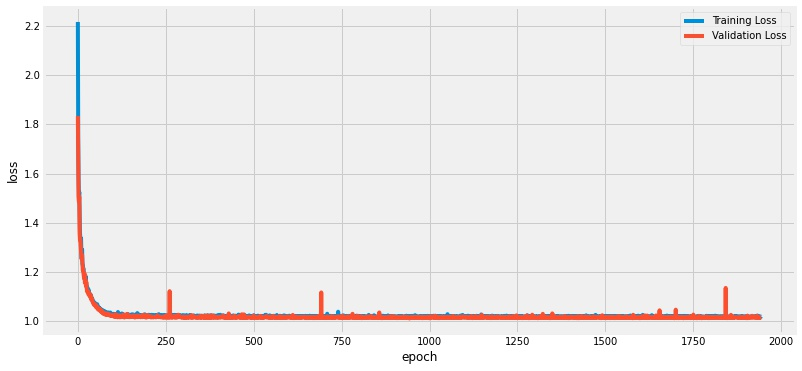

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('epoch'); plt.ylabel('loss')
plt.legend()
plt.savefig('pH_tclab_loss.jpg')
# Save the LSTM model
model_pH.save('model_pH.h5')

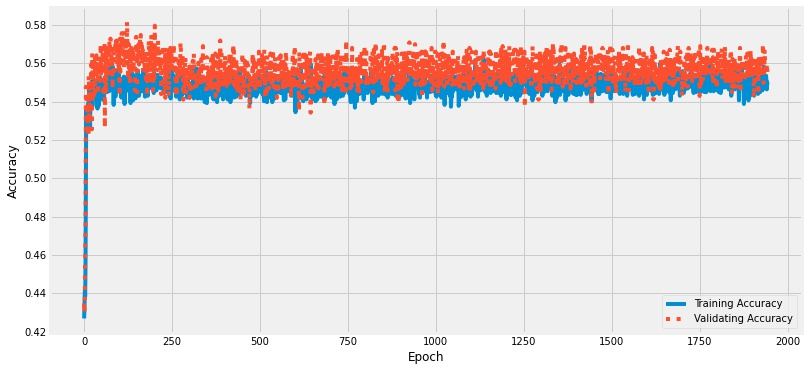

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], ':', label='Validating Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy')
plt.legend()
plt.savefig('pH_tclab_accuracy.jpg')

#### Validation

In [ ]:
ann_pH_A, ann_pH_f1, ann_pH_roc, ann_pH_cm = validation_classifier_function(
    model_pH, y_test_pH, X_test_pH, sel=1)

              precision    recall  f1-score   support

   Class Bom       0.35      0.13      0.19       286
Class Normal       0.57      0.67      0.62       319
  Class Ruim       0.59      0.75      0.66       430

    accuracy                           0.56      1035
   macro avg       0.50      0.52      0.49      1035
weighted avg       0.52      0.56      0.52      1035



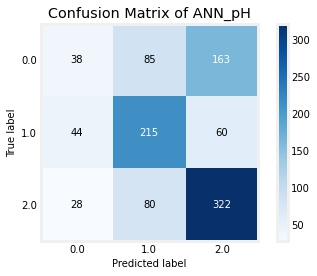

In [ ]:
matrix_de_confusao(model_pH, y_test_pH, X_test_pH, 'ANN_pH', sel=1)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


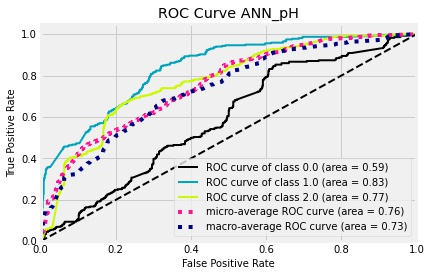

In [ ]:
roc_auc_curves(model_pH, y_test_pH, X_test_pH, 'ANN_pH')

### Level

In [ ]:
model_H = keras.Sequential([
    keras.layers.Input(shape=(7,)),
    keras.layers.Dense(25, activation='relu', kernel_regularizer='l2'),
    keras.layers.Dense(75, activation='relu', kernel_regularizer='l2'),
    keras.layers.Dense(25, activation='relu', kernel_regularizer='l2'),
    keras.layers.Dense(3, activation='softmax', kernel_regularizer='l2')
])

In [ ]:
model_H.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model_H.fit(X_train_H, y_train_H, epochs=1000, batch_size=64,
                    callbacks=es, validation_data=(X_test_H, y_test_H))

Epoch 1/1000
33/33 [==============================] - 0s 6ms/step - loss: 2.3151 - accuracy: 0.6003 - val_loss: 1.9372 - val_accuracy: 0.7074
Epoch 2/1000
33/33 [==============================] - 0s 3ms/step - loss: 1.6839 - accuracy: 0.7093 - val_loss: 1.5033 - val_accuracy: 0.7084
Epoch 3/1000
33/33 [==============================] - 0s 3ms/step - loss: 1.4905 - accuracy: 0.7030 - val_loss: 1.4512 - val_accuracy: 0.7084
Epoch 4/1000
33/33 [==============================] - 0s 4ms/step - loss: 1.3460 - accuracy: 0.7025 - val_loss: 1.4213 - val_accuracy: 0.7074
Epoch 5/1000
33/33 [==============================] - 0s 3ms/step - loss: 1.4188 - accuracy: 0.7049 - val_loss: 1.6484 - val_accuracy: 0.6898
Epoch 6/1000
33/33 [==============================] - 0s 3ms/step - loss: 1.2702 - accuracy: 0.7044 - val_loss: 1.2440 - val_accuracy: 0.6898
Epoch 7/1000
33/33 [==============================] - 0s 3ms/step - loss: 1.2069 - accuracy: 0.6958 - val_loss: 1.1693 - val_accuracy: 0.7104
Epoch 

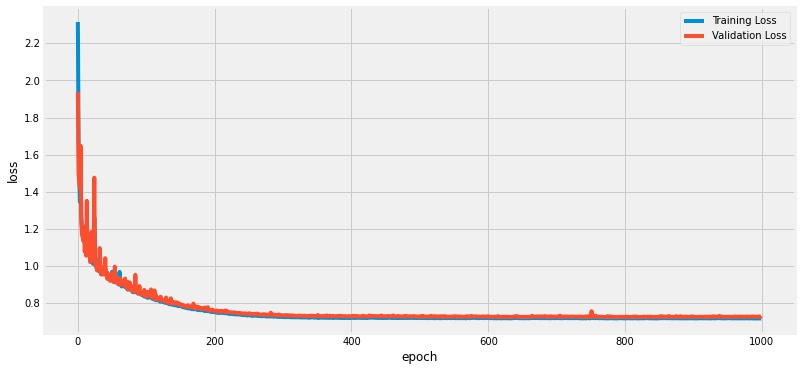

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('epoch'); plt.ylabel('loss')
plt.legend()
plt.savefig('h_tclab_loss.jpg')
# Save the LSTM model
model_H.save('model_H.h5')

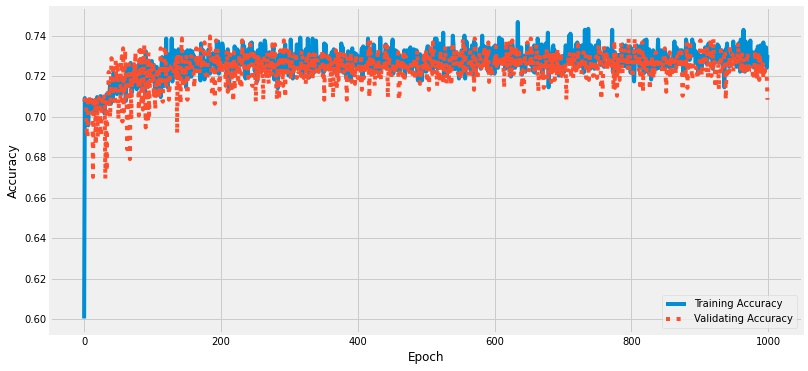

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], ':', label='Validating Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy')
plt.legend()
plt.savefig('h_tclab_accuracy.jpg')

#### Validation

In [ ]:
ann_H_A, ann_H_f1, ann_H_roc, ann_H_cm = validation_classifier_function(
    model_H, y_test_H, X_test_H, sel=1)

              precision    recall  f1-score   support

   Class Bom       0.62      0.09      0.15       188
Class Normal       0.00      0.00      0.00       120
  Class Ruim       0.71      0.99      0.83       714

    accuracy                           0.71      1022
   macro avg       0.44      0.36      0.33      1022
weighted avg       0.61      0.71      0.61      1022



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


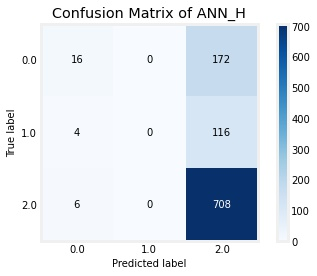

In [ ]:
matrix_de_confusao(model_H, y_test_H, X_test_H, 'ANN_H', sel=1)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


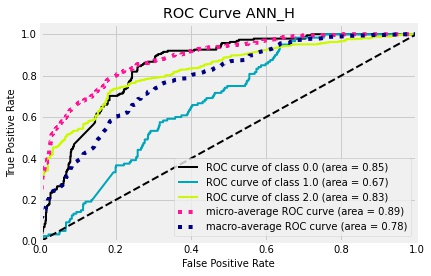

In [ ]:
roc_auc_curves(model_H, y_test_H, X_test_H, 'ANN_H')

## Building SVM models

### Clarke

In [ ]:
svm = SVC(C=1000, gamma='auto', class_weight='balanced', probability=True)
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.8284118116520351

In [ ]:
# svm1 = SVC(C=1000, gamma='auto', class_weight='balanced', probability=True)
# y_scores = svm1.fit(X_train, y_train).decision_function(X_test)

#### Validation

In [ ]:
ann_H_A, ann_H_f1, ann_H_roc, ann_H_cm = validation_classifier_function(
    svm, y_test, X_test, sel=0)

              precision    recall  f1-score   support

   Class Bom       0.81      0.83      0.82       398
Class Normal       0.71      0.81      0.76       351
  Class Ruim       0.95      0.84      0.89       504

    accuracy                           0.83      1253
   macro avg       0.82      0.83      0.82      1253
weighted avg       0.84      0.83      0.83      1253



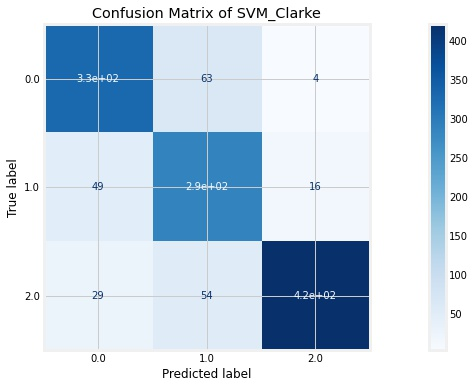

In [ ]:
matrix_de_confusao(svm, y_test, X_test, 'SVM_Clarke', sel=0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


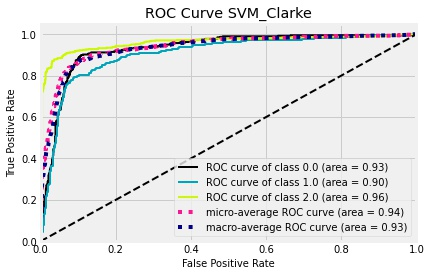

In [ ]:
roc_auc_curves(svm, y_test, X_test, 'SVM_Clarke')

### pH

In [ ]:
svm_pH = SVC(C=2, gamma=1/0.01, kernel='rbf', 
             degree=4, class_weight='balanced', probability=True)
svm_pH.fit(X_train_pH[:,(0,1,4,5,6)], y_train_pH)
svm_pH.score(X_test_pH[:,(0,1,4,5,6)], y_test_pH)

0.7381642512077294

#### Validation

In [ ]:
ann_pH_A, ann_pH_f1, ann_pH_roc, ann_pH_cm = validation_classifier_function(
    svm_pH, y_test_pH, X_test_pH[:,(0,1,4,5,6)], sel=0)

              precision    recall  f1-score   support

   Class Bom       0.66      0.67      0.66       286
Class Normal       0.68      0.77      0.72       319
  Class Ruim       0.85      0.76      0.80       430

    accuracy                           0.74      1035
   macro avg       0.73      0.73      0.73      1035
weighted avg       0.75      0.74      0.74      1035



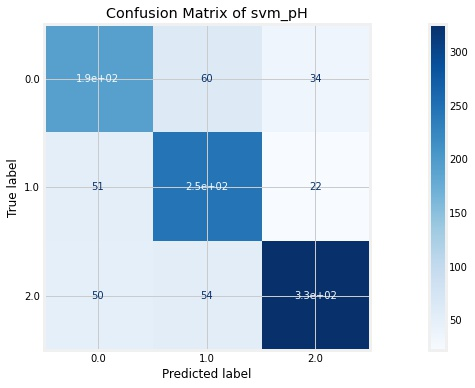

In [ ]:
matrix_de_confusao(svm_pH, y_test_pH, X_test_pH[:,(0,1,4,5,6)], 'svm_pH', sel=0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


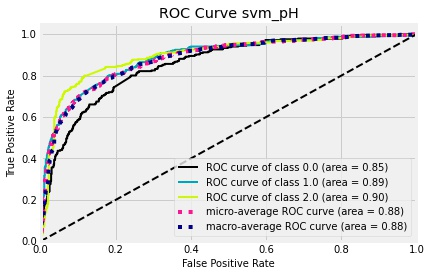

In [ ]:
roc_auc_curves(svm_pH, y_test_pH, X_test_pH[:,(0,1,4,5,6)], 'svm_pH')

### Level

In [ ]:
svm_H = SVC(C=5, gamma=1/0.001, kernel='rbf',
            degree=4, class_weight='balanced', probability=True)
svm_H.fit(X_train_H[:,(2,3,5,6)], y_train_H)
svm_H.score(X_test_H[:,(2,3,5,6)], y_test_H)

0.7054794520547946

#### Validation

In [ ]:
ann_H_A, ann_H_f1, ann_H_roc, ann_H_cm = validation_classifier_function(
    svm_H, y_test_H, X_test_H[:,(2,3,5,6)], sel=0)

              precision    recall  f1-score   support

   Class Bom       0.55      0.44      0.49       188
Class Normal       0.36      0.50      0.42       120
  Class Ruim       0.82      0.81      0.81       714

    accuracy                           0.71      1022
   macro avg       0.58      0.58      0.57      1022
weighted avg       0.72      0.71      0.71      1022



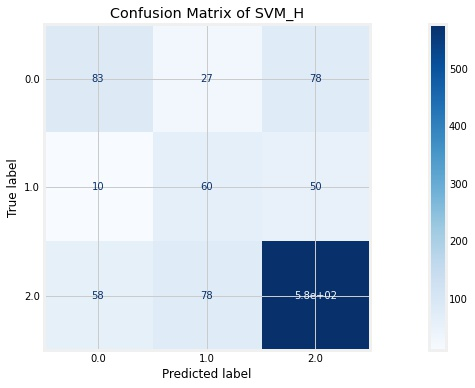

In [ ]:
matrix_de_confusao(svm_H, y_test_H, X_test_H[:,(2,3,5,6)], 'SVM_H', sel=0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


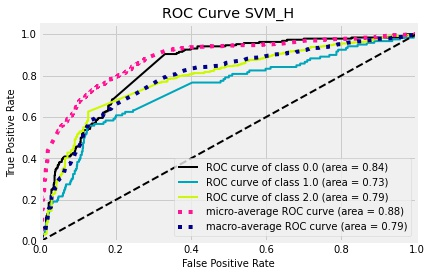

In [ ]:
roc_auc_curves(svm_H, y_test_H, X_test_H[:,(2,3,5,6)], 'SVM_H')

### Saving the models

In [ ]:
file_name = 'svm_models'
with open(file_name, 'wb') as f:
        pickle.dump([svm, svm_H, svm_pH], f)

## Building RandomForrest models

### Clarke

In [ ]:
fr = ensemble.RandomForestClassifier(class_weight='balanced')
fr.fit(X_train, y_train)
fr.score(X_test, y_test)

0.8587390263367917

#### Validation

In [ ]:

fr_c_A, fr_c_f1, fr_c_roc, fr_c_cm = validation_classifier_function(
    fr, y_test, X_test)


              precision    recall  f1-score   support

   Class Bom       0.83      0.86      0.85       398
Class Normal       0.79      0.79      0.79       351
  Class Ruim       0.93      0.90      0.91       504

    accuracy                           0.86      1253
   macro avg       0.85      0.85      0.85      1253
weighted avg       0.86      0.86      0.86      1253



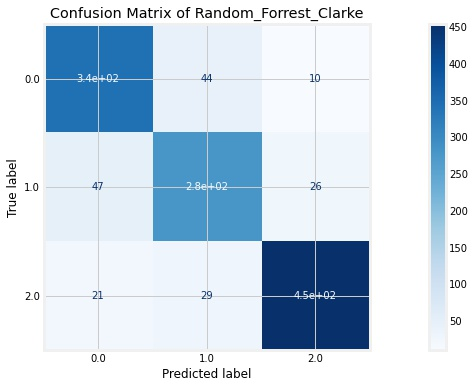

In [ ]:
matrix_de_confusao(fr, y_test, X_test,'Random_Forrest_Clarke')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


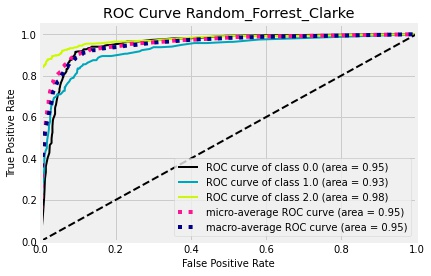

In [ ]:
roc_auc_curves(fr, y_test, X_test,'Random_Forrest_Clarke')

### Level

In [ ]:
fr_H = ensemble.RandomForestClassifier(class_weight='balanced')
fr_H.fit(X_train_H, y_train_H)
fr_H.score(X_test_H, y_test_H)

0.7416829745596869

#### Validation

In [ ]:
ann_H_A, ann_H_f1, ann_H_roc, ann_H_cm = validation_classifier_function(
    fr_H, y_test_H, X_test_H, sel=0)

              precision    recall  f1-score   support

   Class Bom       0.53      0.55      0.54       188
Class Normal       0.44      0.45      0.44       120
  Class Ruim       0.85      0.84      0.85       714

    accuracy                           0.74      1022
   macro avg       0.61      0.61      0.61      1022
weighted avg       0.74      0.74      0.74      1022



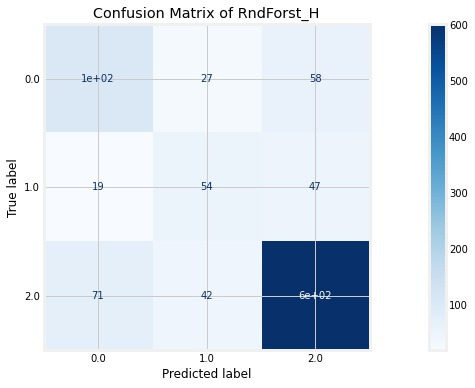

In [ ]:
matrix_de_confusao(fr_H, y_test_H, X_test_H, 'RndForst_H', sel=0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


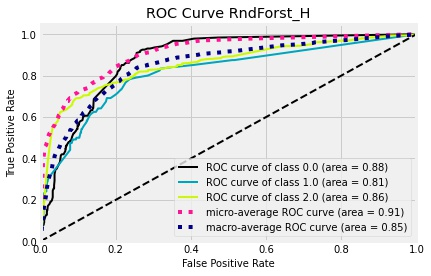

In [ ]:
roc_auc_curves(fr_H, y_test_H, X_test_H, 'RndForst_H')

### pH

In [ ]:
fr_pH = ensemble.RandomForestClassifier(class_weight='balanced')
fr_pH.fit(X_train_pH, y_train_pH)
fr_pH.score(X_test_pH, y_test_pH)

0.7584541062801933

#### Validation

In [ ]:
ann_pH_A, ann_pH_f1, ann_pH_roc, ann_pH_cm = validation_classifier_function(
    fr_pH, y_test_pH, X_test_pH, sel=0)

              precision    recall  f1-score   support

   Class Bom       0.63      0.69      0.66       286
Class Normal       0.76      0.73      0.74       319
  Class Ruim       0.85      0.83      0.84       430

    accuracy                           0.76      1035
   macro avg       0.75      0.75      0.75      1035
weighted avg       0.76      0.76      0.76      1035



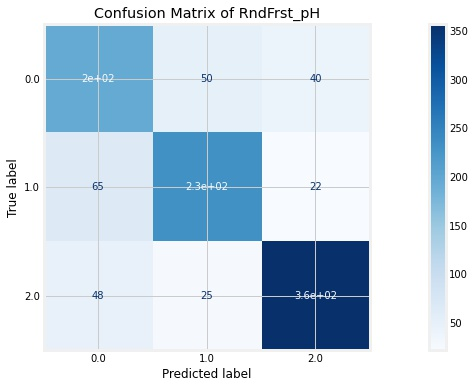

In [ ]:
matrix_de_confusao(fr_pH, y_test_pH, X_test_pH, 'RndFrst_pH', sel=0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


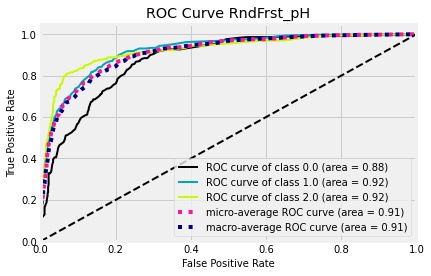

In [ ]:
roc_auc_curves(fr_pH, y_test_pH, X_test_pH, 'RndFrst_pH')

### Saving the models

In [ ]:
file_name = 'rndforrest_models'
with open(file_name, 'wb') as f:
        pickle.dump([fr, fr_H, fr_pH], f)

## Building Ensemble Bagging KNN models

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
bagging = ensemble.BaggingClassifier(KNeighborsClassifier(
    n_neighbors=5, weights='distance'), n_estimators=150, 
                            max_samples=0.5, max_features=0.5)

### Clarke

In [ ]:
bagg_clarke = bagging
bagg_clarke.fit(X_train, y_train)
bagg_clarke.score(X_test, y_test)

0.8579409417398244

#### Validation

In [ ]:
ann_H_A, ann_H_f1, ann_H_roc, ann_H_cm = validation_classifier_function(
    bagg_clarke, y_test, X_test, sel=0)

              precision    recall  f1-score   support

   Class Bom       0.82      0.88      0.85       398
Class Normal       0.81      0.78      0.80       351
  Class Ruim       0.92      0.90      0.91       504

    accuracy                           0.86      1253
   macro avg       0.85      0.85      0.85      1253
weighted avg       0.86      0.86      0.86      1253



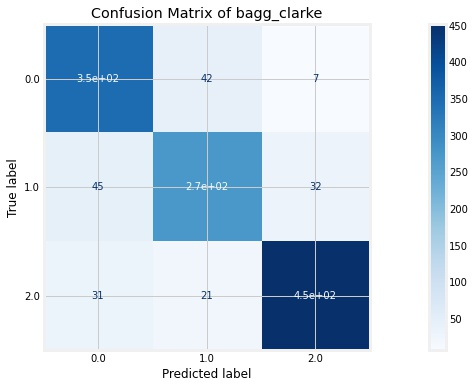

In [ ]:
matrix_de_confusao(bagg_clarke, y_test, X_test, 'bagg_clarke', sel=0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


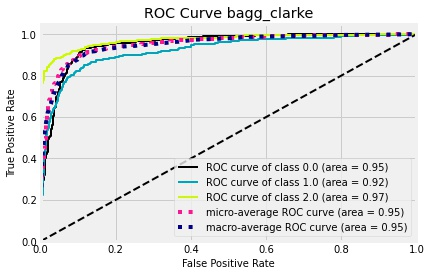

In [ ]:
roc_auc_curves(bagg_clarke, y_test, X_test, 'bagg_clarke')

### Level

In [ ]:
bagg_H = bagging
bagg_H.fit(X_train_H, y_train_H)
bagg_H.score(X_test_H, y_test_H)

0.7690802348336595

#### Validation

In [ ]:
ann_H_A, ann_H_f1, ann_H_roc, ann_H_cm = validation_classifier_function(
    bagg_H, y_test_H, X_test_H, sel=0)

              precision    recall  f1-score   support

   Class Bom       0.58      0.59      0.58       188
Class Normal       0.74      0.26      0.38       120
  Class Ruim       0.82      0.90      0.86       714

    accuracy                           0.77      1022
   macro avg       0.71      0.58      0.61      1022
weighted avg       0.76      0.77      0.75      1022



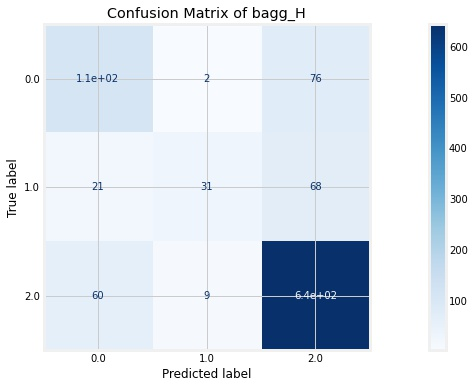

In [ ]:
matrix_de_confusao(bagg_H, y_test_H, X_test_H, 'bagg_H', sel=0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


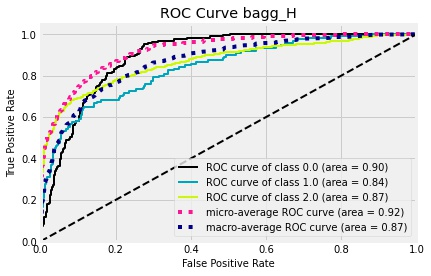

In [ ]:
roc_auc_curves(bagg_H, y_test_H, X_test_H, 'bagg_H')

### pH

In [ ]:
bagg_pH = bagging
bagg_pH.fit(X_train_pH, y_train_pH)
bagg_pH.score(X_test_pH, y_test_pH)

0.7526570048309179

#### Validation

In [ ]:
ann_pH_A, ann_pH_f1, ann_pH_roc, ann_pH_cm = validation_classifier_function(
    bagg_pH, y_test_pH, X_test_pH, sel=0)

              precision    recall  f1-score   support

   Class Bom       0.64      0.66      0.65       286
Class Normal       0.77      0.72      0.74       319
  Class Ruim       0.81      0.84      0.82       430

    accuracy                           0.75      1035
   macro avg       0.74      0.74      0.74      1035
weighted avg       0.75      0.75      0.75      1035



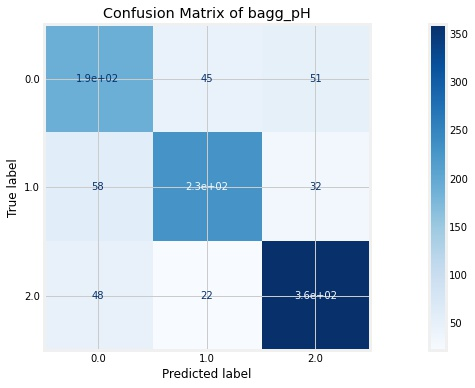

In [ ]:
matrix_de_confusao(bagg_pH, y_test_pH, X_test_pH, 'bagg_pH', sel=0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


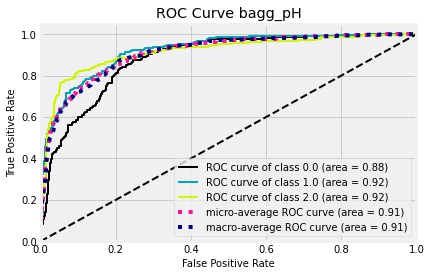

In [ ]:
roc_auc_curves(bagg_pH, y_test_pH, X_test_pH, 'bagg_pH')

### Saving the models

In [ ]:
file_name = 'bagging_models'
with open(file_name, 'wb') as f:
        pickle.dump([bagg_clarke, bagg_H, bagg_pH], f)

## Building Ensemble GradientBoosting models

### Clarke

In [ ]:
gbc_clarke = ensemble.GradientBoostingClassifier(
    loss='deviance', max_depth=20, random_state=0)
gbc_clarke.fit(X_train, y_train)
gbc_clarke.score(X_test, y_test)

0.8579409417398244

#### Validation

In [ ]:
ann_H_A, ann_H_f1, ann_H_roc, ann_H_cm = validation_classifier_function(
    gbc_clarke, y_test, X_test, sel=0)

              precision    recall  f1-score   support

   Class Bom       0.83      0.85      0.84       398
Class Normal       0.79      0.80      0.80       351
  Class Ruim       0.93      0.90      0.91       504

    accuracy                           0.86      1253
   macro avg       0.85      0.85      0.85      1253
weighted avg       0.86      0.86      0.86      1253



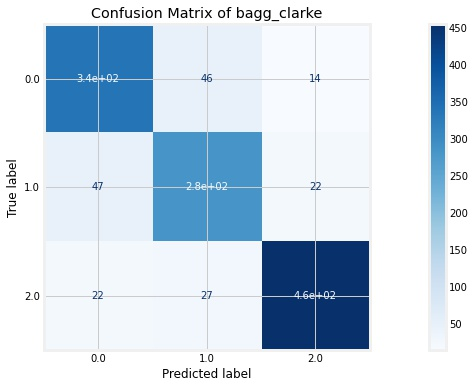

In [ ]:
matrix_de_confusao(gbc_clarke, y_test, X_test, 'bagg_clarke', sel=0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


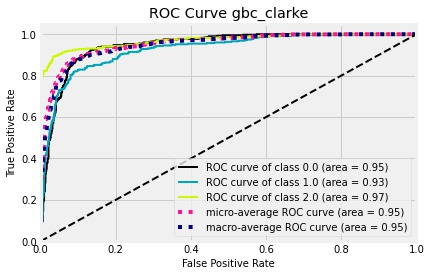

In [ ]:
roc_auc_curves(gbc_clarke, y_test, X_test, 'gbc_clarke')

### Level

In [ ]:
gbc_H = ensemble.GradientBoostingClassifier(
    loss='deviance', learning_rate=0.01, n_estimators=200, 
    max_depth=20, random_state=0)
gbc_H.fit(X_train_H, y_train_H)
gbc_H.score(X_test_H, y_test_H)

0.7348336594911937

#### Validation

In [ ]:
ann_H_A, ann_H_f1, ann_H_roc, ann_H_cm = validation_classifier_function(
    gbc_H, y_test_H, X_test_H, sel=0)

              precision    recall  f1-score   support

   Class Bom       0.53      0.45      0.48       188
Class Normal       0.55      0.22      0.31       120
  Class Ruim       0.79      0.90      0.84       714

    accuracy                           0.73      1022
   macro avg       0.62      0.52      0.54      1022
weighted avg       0.71      0.73      0.71      1022



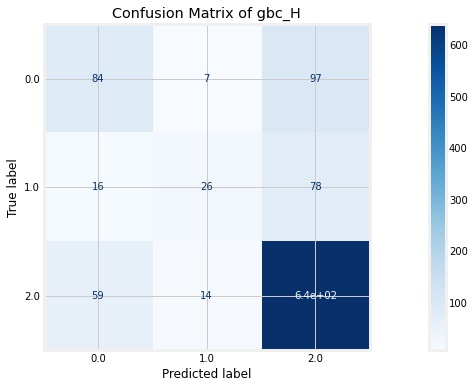

In [ ]:
matrix_de_confusao(gbc_H, y_test_H, X_test_H, 'gbc_H', sel=0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


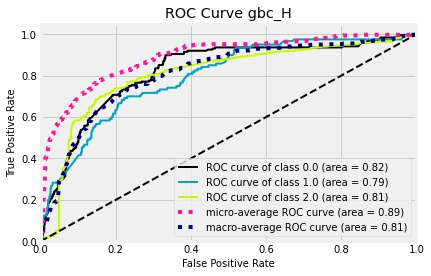

In [ ]:
roc_auc_curves(gbc_H, y_test_H, X_test_H, 'gbc_H')

### pH

In [ ]:
gbc_pH = ensemble.GradientBoostingClassifier(
    loss='deviance', max_depth=20, random_state=0)
gbc_pH.fit(X_train_pH, y_train_pH)
gbc_pH.score(X_test_pH, y_test_pH)

0.736231884057971

#### Validation

In [ ]:
ann_pH_A, ann_pH_f1, ann_pH_roc, ann_pH_cm = validation_classifier_function(
    gbc_pH, y_test_pH, X_test_pH, sel=0)

              precision    recall  f1-score   support

   Class Bom       0.62      0.69      0.65       286
Class Normal       0.75      0.68      0.71       319
  Class Ruim       0.82      0.80      0.81       430

    accuracy                           0.74      1035
   macro avg       0.73      0.73      0.73      1035
weighted avg       0.74      0.74      0.74      1035



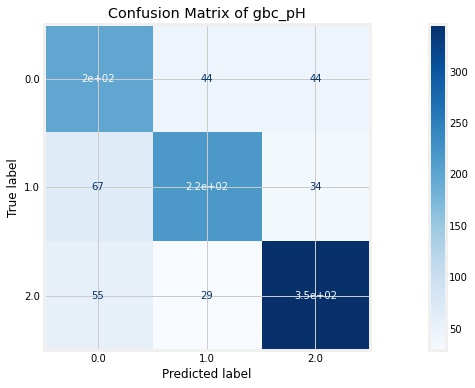

In [ ]:
matrix_de_confusao(gbc_pH, y_test_pH, X_test_pH, 'gbc_pH', sel=0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


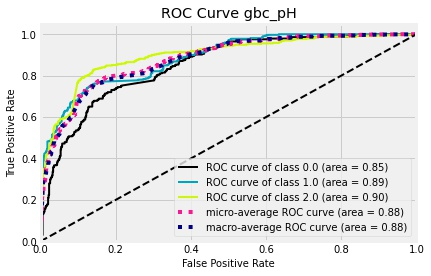

In [ ]:
roc_auc_curves(gbc_pH, y_test_pH, X_test_pH, 'gbc_pH')

### Saving the models

In [ ]:
file_name = 'gbc_models'
with open(file_name, 'wb') as f:
        pickle.dump([gbc_clarke, gbc_H, gbc_pH], f)